In [32]:
%reset -f

import numpy as np
import pandas as pd
import seaborn as sns
import warnings


import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [33]:

df = pd.read_csv('diabetes.csv')



df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


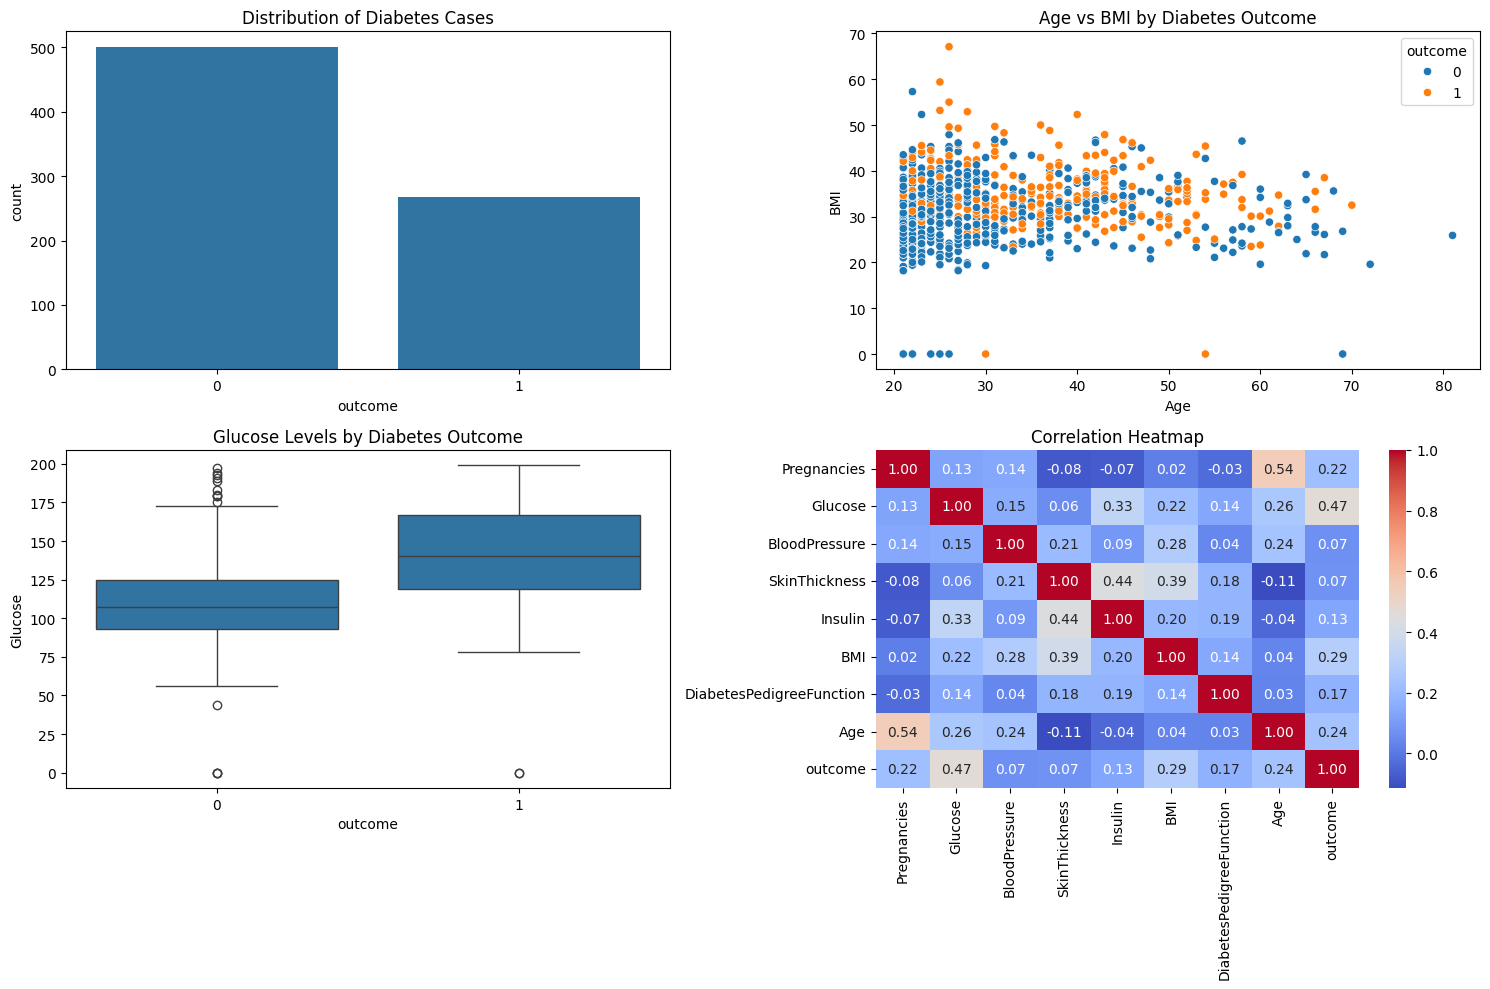

In [34]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='outcome', data=df)
plt.title('Distribution of Diabetes Cases')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Age', y='BMI', hue='outcome')
plt.title('Age vs BMI by Diabetes Outcome')

plt.subplot(2, 2, 3)
sns.boxplot(x='outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome')

plt.subplot(2, 2, 4)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()

    

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('outcome', axis=1)
y = df['outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)



In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

cr = classification_report(y_test, y_pred)
print('Classification Report:')
print(cr)



Accuracy: 0.75
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [38]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    "C": range(1, 16),
    "max_iter": range(100, 1001, 100),
    }


# Create the grid search object
grid_log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search
grid_log_reg.fit(X_train, y_train)

best_params = grid_log_reg.best_params_
print(f'Best Hyperparameters: {best_params}')

y_pred = grid_log_reg.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

cr = classification_report(y_test, y_pred)
print('Classification Report:')
print(cr)





Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Hyperparameters: {'C': 8, 'max_iter': 100}
Accuracy: 0.77
Confusion Matrix:
[[82 17]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

